# Simple Differential Rotation

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/simple_differential_rotation.html

The Sun is known to rotate differentially, meaning that the rotation rate
near the poles (rotation period of approximately 35 days) is not the same as
the rotation rate near the equator (rotation period of approximately 25 days).
This is possible because the Sun is not a solid body. Though it is still poorly
understood, it is fairly well measured and must be taken into account
when comparing observations of features on the Sun over time.
A good review can be found in Beck 1999 Solar Physics 191, 47–70.
This example illustrates solar differential rotation.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import TimeDelta

import sunpy.data.sample
import sunpy.map
from sunpy.physics.differential_rotation import solar_rotate_coordinate
from sunpy.sun.models import differential_rotation

Next lets explore solar differential rotation by replicating Figure 1
in Beck 1999.

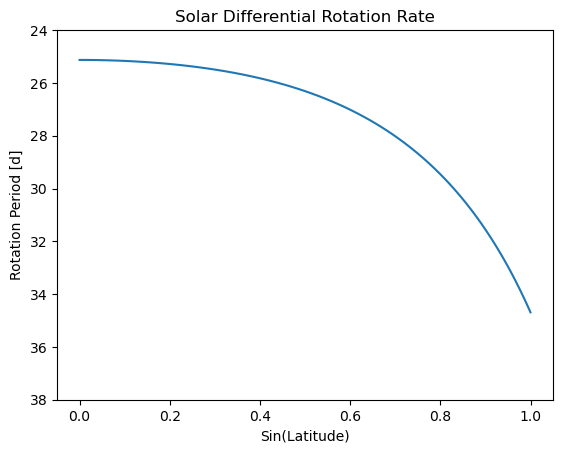

In [ ]:
latitudes = np.arange(0, 90, 1) * u.deg
dt = 1 * u.day
rotation_rate = differential_rotation(dt, latitudes) / dt
rotation_period = 360 * u.deg / rotation_rate

plt.figure()
plt.plot(np.sin(latitudes), rotation_period.value)
plt.ylim(38, 24)
plt.ylabel(f'Rotation Period [{rotation_period.unit}]')
plt.xlabel('Sin(Latitude)')
plt.title('Solar Differential Rotation Rate')
plt.show()

Next let's show how to this looks like on the Sun.
Load in an AIA map:

In [ ]:
aia_map = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)

Let's define our starting coordinates.

In [ ]:
hpc_y = np.arange(-700, 800, 100) * u.arcsec
hpc_x = np.zeros_like(hpc_y)

Let's define how many days in the future we want to rotate to.

In [ ]:
dt = TimeDelta(4*u.day)
future_date = aia_map.date + dt

Now let's plot the original and rotated positions on the AIA map.

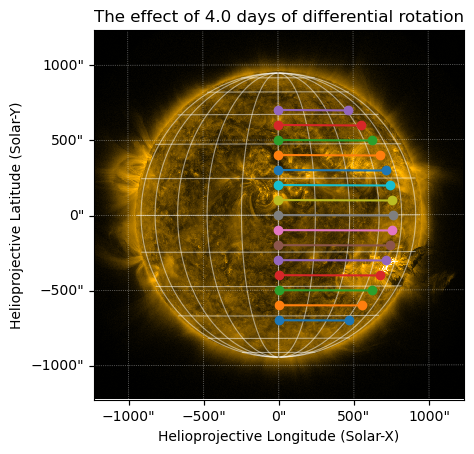

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)
aia_map.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)
ax.set_title(f'The effect of {dt.to(u.day).value} days of differential rotation')
aia_map.draw_grid(axes=ax)

for this_hpc_x, this_hpc_y in zip(hpc_x, hpc_y):
    start_coord = SkyCoord(this_hpc_x, this_hpc_y, frame=aia_map.coordinate_frame)
    rotated_coord = solar_rotate_coordinate(start_coord, time=future_date)
    coord = SkyCoord([start_coord.Tx, rotated_coord.Tx],
                     [start_coord.Ty, rotated_coord.Ty],
                     frame=aia_map.coordinate_frame)
    ax.plot_coord(coord, 'o-')
ax.set_ylim(0, aia_map.data.shape[1])
ax.set_xlim(0, aia_map.data.shape[0])

plt.show()